# Exploratory Data Analysis (EDA) #

## Set Up Python Environment ##

In [3]:
# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# If using Jupyter Notebook, enable inline plotting
%matplotlib inline

## Load The Cleaned Data ##

In [5]:
# Load the CSV file that exported from BigQuery
path = "C:/Users/Jonat/DataProject/CLV and Customer Segmentation/aggregated_data.csv"
df = pd.read_csv(path)

# Display the first few rows to verify the data
print(df.head(5))

         fullVisitorId  total_sessions  total_transactions  total_revenue  \
0  9308310352918219134               2                   1        2933.61   
1   126612099954375841               1                   1        1000.78   
2  7311242886083854158               1                   1         982.73   
3  7420300501523012460               3                   2         570.11   
4  4871061239735971842               2                   1         347.14   

   avg_pageviews  revenue_rank  
0      29.000000             1  
1      32.000000             2  
2      17.000000             3  
3      44.666667             4  
4      22.500000             5  


## Understand the Data with Summary Statistics ##

In [7]:
# Get a concise summary of DataFrame
print("A concise summary of DataFrame: ")
df.info()

# Generate summary statistics for numerical columns
print("\nSummary statistics: ")
print(df.describe())

# Check for missing values
print("\nMissing values for each column: ")
print(df.isnull().sum())

A concise summary of DataFrame: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   fullVisitorId       42 non-null     uint64 
 1   total_sessions      42 non-null     int64  
 2   total_transactions  42 non-null     int64  
 3   total_revenue       42 non-null     float64
 4   avg_pageviews       42 non-null     float64
 5   revenue_rank        42 non-null     int64  
dtypes: float64(2), int64(3), uint64(1)
memory usage: 2.1 KB

Summary statistics: 
       fullVisitorId  total_sessions  total_transactions  total_revenue  \
count   4.200000e+01       42.000000           42.000000      42.000000   
mean    3.979789e+18        1.500000            1.071429     197.736667   
std     3.436339e+18        0.634381            0.260661     486.958864   
min     3.717832e+15        1.000000            1.000000       1.990000   
25%     7.44045

## Visualize Key Distributions and Relationships ##

### A. Visualize Distribution of Total Revenue ###

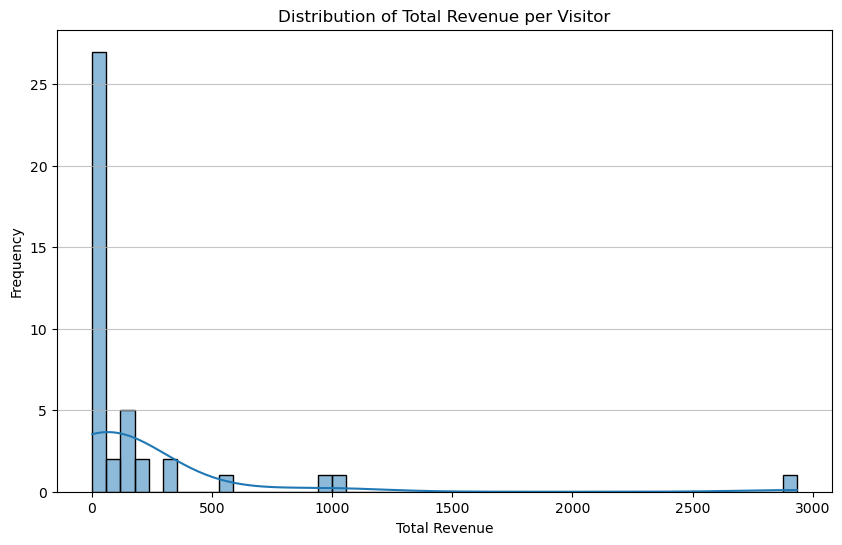

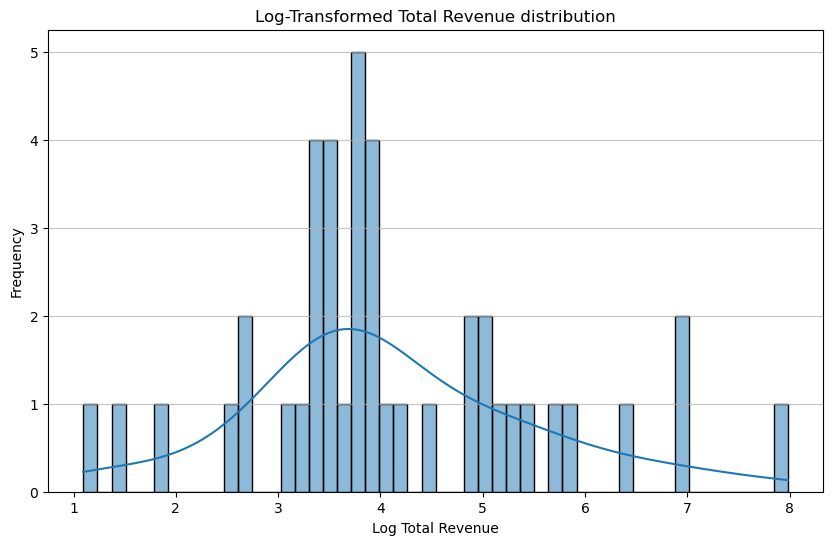

In [10]:
# Distribution of Total Revenue
plt.figure(figsize=(10, 6))
sns.histplot(df['total_revenue'], bins=50, kde=True)
plt.title('Distribution of Total Revenue per Visitor')
plt.xlabel('Total Revenue')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

# applying log transformation for better visualization if highly skewed
df['log_total_revenue'] = np.log(df['total_revenue'] + 1)

plt.figure(figsize=(10, 6))
sns.histplot(df['log_total_revenue'], bins=50, kde=True)
plt.title('Log-Transformed Total Revenue distribution')
plt.xlabel('Log Total Revenue')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

### B. Visualize Distribution of Total Transactions and Total Revenue by Total Transactions (Box Plot) ###

C:\Users\jonat\AppData\Local\Temp\ipykernel_16200\1549783908.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='total_transactions', data=df, palette='viridis')


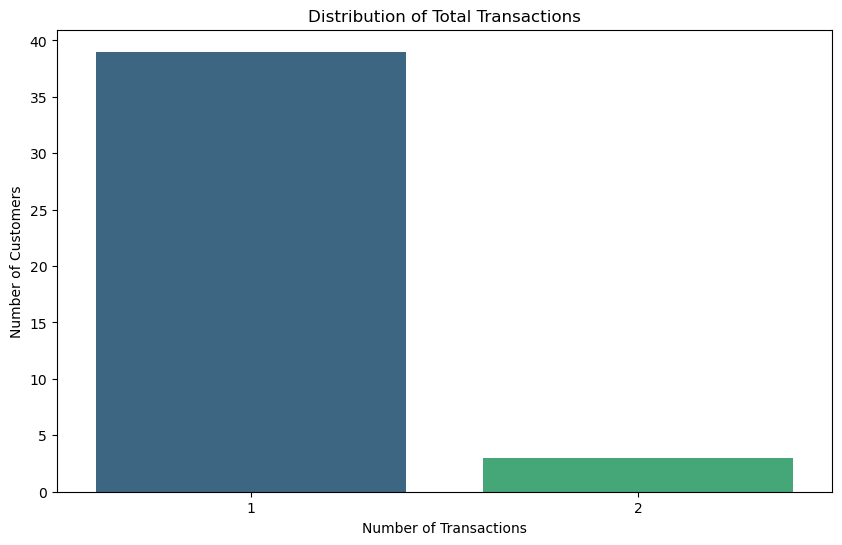

C:\Users\jonat\AppData\Local\Temp\ipykernel_16200\1549783908.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='total_transactions', y='total_revenue', data=df, palette='plasma')


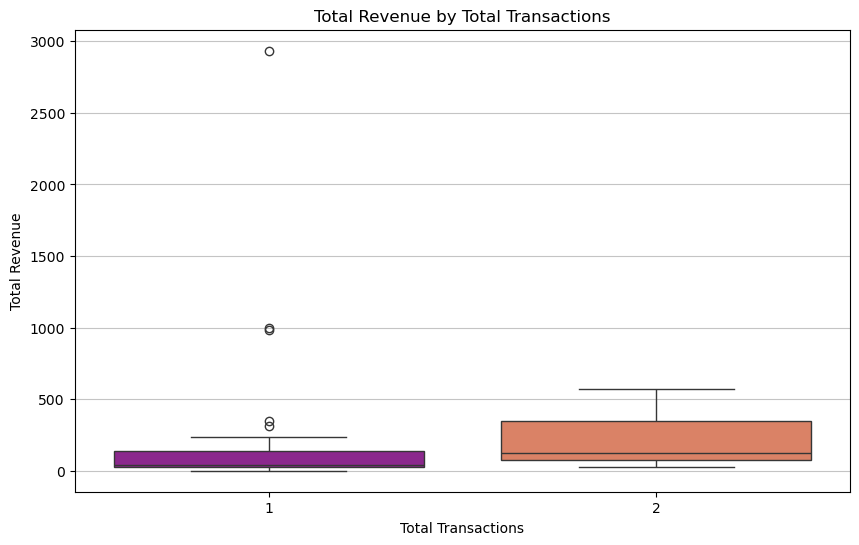

In [12]:
# Distribution of Total Transactions 
plt.figure(figsize=(10,6))
sns.countplot(x='total_transactions', data=df, palette='viridis')
plt.title("Distribution of Total Transactions")
plt.xlabel('Number of Transactions')
plt.ylabel('Number of Customers')
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x='total_transactions', y='total_revenue', data=df, palette='plasma')
plt.title('Total Revenue by Total Transactions')
plt.xlabel('Total Transactions')
plt.ylabel('Total Revenue')
plt.grid(axis='y', alpha=0.75)
plt.show()

### C. Scatter Plot: Sessions vs. Revenue ###

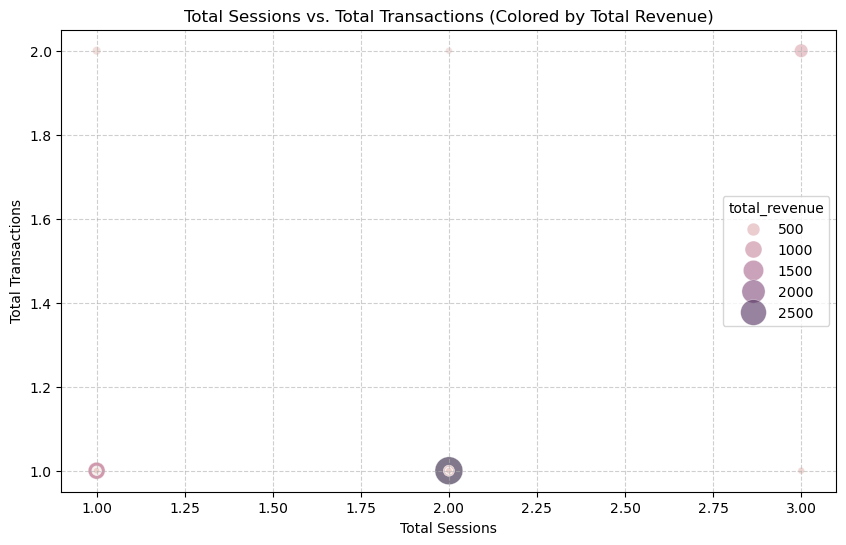

In [14]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='total_sessions', y='total_transactions', data=df, hue='total_revenue', size='total_revenue', sizes=(20, 400), alpha=0.6)
plt.title('Total Sessions vs. Total Transactions (Colored by Total Revenue)')
plt.xlabel('Total Sessions')
plt.ylabel('Total Transactions')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


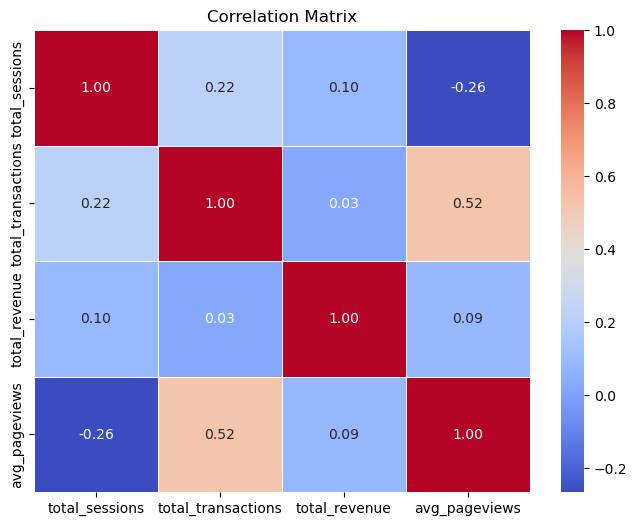

In [15]:
plt.figure(figsize=(8,6))
correlation = df[['total_sessions', 'total_transactions', 'total_revenue', 'avg_pageviews']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidth=.5 )
plt.title('Correlation Matrix')
plt.show()


In [16]:
df.to_csv('eda_processed_data.csv', index=False)